In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc

### Importing heart.csv dataset


In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


### No null values found in dataset.

## Linear regression model
The maximum heart rate (thalach) is predicted based on age using this model.

In [ ]:
X_1 = df[['age']]
y_1 = df['thalach']

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

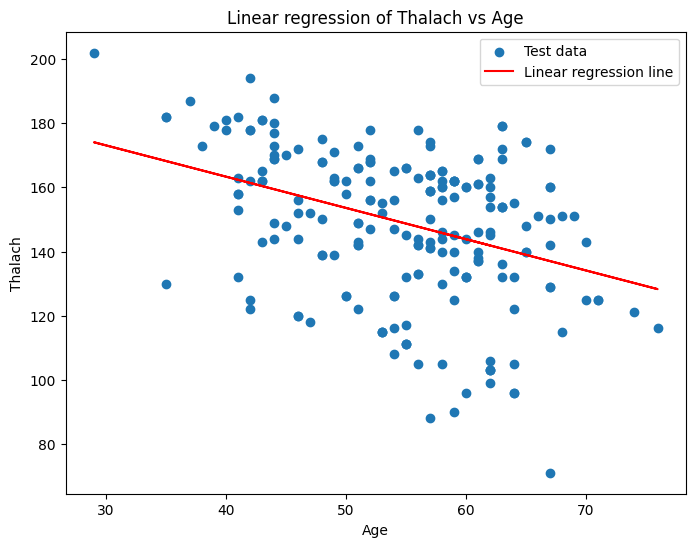

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train_1, y_train_1)
y_pred_1 = linear_model.predict(X_test_1)

plt.figure(figsize=(8, 6))
plt.scatter(X_test_1, y_test_1, label='Test data')
plt.plot(X_test_1, y_pred_1, color='red', label='Linear regression line')
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.title('Linear regression of Thalach vs Age')
plt.legend()
plt.show()

### The plot shows a general trend of decreasing maximum heart rate with increasing age. The red line represents the linear model's prediction.

## Logistic Regression Model
This model aimed to predict the likelihood of heart disease (target) using age, sex, cp, trestbps, and chol.

In [ ]:
X_2 = df[['age', 'sex', 'cp', 'trestbps', 'chol']]
Y_2 = df['target']

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, Y_2, test_size=0.2, random_state=42)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_2, y_train_2)

LogisticRegression()

In [ ]:
y_pred_2 = logistic_model.predict(X_test_2)
f1 = f1_score(y_test_2, y_pred_2)
y_prob_2 = logistic_model.predict_proba(X_test_2)[:, 1]
roc_auc = roc_auc_score(y_test_2, y_prob_2)

print(f'F1 score: {f1:.2f}')
print(f'ROC-AUC score: {roc_auc:.2f}')

F1 score: 0.79
ROC-AUC score: 0.86


## Metrics Interpretation

*   F1-Score: It is the harmonic mean of recall and precision. It provides a balance between correctly identifying positive cases and avoiding false positives. An F1-score of 0.79 means that the model has a good balance of precision and recall in predicting heart disease.

*   ROC-AUC Score: It is the score that represents the model's ability to distinguish between positive and negative classes. It plots true positive rate against false positive rate. An ROC-AUC score of 0.86 indicates that the model has a good ability to discriminate between patients with and without heart disease.

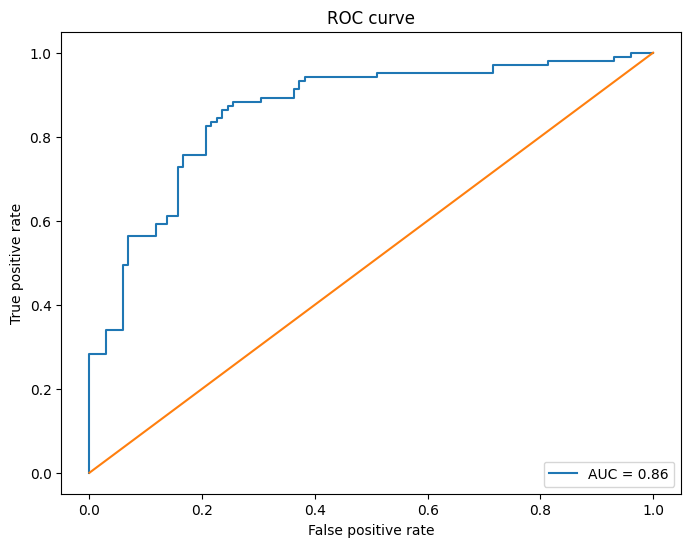

In [ ]:
fpr, tpr, ts = roc_curve(y_test_2, y_prob_2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

## Conclusion

*   The linear regression model shows a clear negative correlation between age and maximum heart rate.
*   The logistic regression model shows good performance in predicting as indicated by the F1-score of 0.79 and an ROC-AUC score of 0.86.
*   The ROC curve visually confirms the model's ability to distinguish between the two classes.